In [1]:
# Do this before run:
# pip install sexpdata

# summarised numbers are in ../*/results/table_sexp.txt
# which are dumped by Core_bench

import sexpdata
from pathlib import Path
from IPython.display import display

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd 


matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 


In [2]:
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c',
                  '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f',
                  '#bcbd22', '#17becf']

cobalt = '#1f77b4' # color name?
blue = '#4400FF'
yellow = '#FFD500'
purple = '#e377c2'
red = '#d62728'
green = '#2ca02c'
orange = '#ff7f0e'


#sta_color = blue
#dyn_color = yellow
sta_color = cobalt
dyn_color = orange
bare_color = green
cps_color = yellow

sta_marker = 'o'
dyn_marker = 'v'

def make_space_above(axes, topmargin=1):
    """ increase figure size to make topmargin (in inches) space for 
        titles, without changing the axes sizes"""
    fig = axes.flatten()[0].figure
    s = fig.subplotpars
    w, h = fig.get_size_inches()

    figh = h - (1-s.top)*h  + topmargin
    fig.subplots_adjust(bottom=s.bottom*h/figh, top=1-topmargin/figh)
    fig.set_figheight(figh)
    
def scale(xs):
    return [x/1000 for x in xs]

def mkdataIdx(dic, kind, labels, key='time_per_run_nanos'):
    return [dic[kind+':'+x][key]/1000 for x in labels]

def mkdataIdxMillis(dic, kind, labels, key='time_per_run_nanos'):
    return [dic[kind+':'+x][key]/1000000 for x in labels]

def mkdata(dic, kind, key='time_per_run_nanos'):
    return [dic[kind][key] /1000]


In [3]:
# convert benchmark sexp to a list of dicts
def load_sexp(fname):
    txt = Path(fname).read_text()
    rows = sexpdata.loads(txt)
    rows = [dict((sym.value(),val) for [sym,val] in row) for row in rows]
    rows = dict((row['full_benchmark_name'].value(),row) for row in rows)
    return rows

# display(rows)

ping_ev = load_sexp('../results/ev_pingpong.txt')
ping_lwt = load_sexp('../results/lwt_pingpong.txt')
ping_ev.update(ping_lwt)
ping = ping_ev
nping = load_sexp('../results/lwt_nping.txt')
cham = load_sexp('../results/lwt_chameleons.txt')
# champ = load_sexp('../chameleons/results_pipes/table_sexp.txt')
bare_ev = load_sexp('../results/ev_bare_pingpong.txt')
bare_lwt = load_sexp('../results/lwt_bare_pingpong.txt')
bare_ev.update(bare_lwt)
bare = bare_ev



In [4]:
display(bare)

{'ev_bare': {'benchmark_name': '',
  'benchmark_name_with_index': Symbol('ev_bare'),
  'full_benchmark_name': Symbol('ev_bare'),
  'dup_id': [],
  'file_name': '',
  'module_name': '',
  'library_name': '',
  'version': Symbol('NO_VERSION_UTIL'),
  'hg_revision': [],
  'hg_active_bookmark': [],
  'x_library_inlining': Symbol('false'),
  'ocaml_version': '',
  'machine_where_benchmark_was_run': Symbol('assam'),
  'epoch_time_of_run': 1587346205535326637,
  'time_of_hg_revision': [],
  'time_r_square': 0,
  'time_per_run_nanos': 5868.288011545541,
  'ci95_upper_bound': 0,
  'ci95_lower_bound': 0,
  'minor_words_per_run': 276.03181182082506,
  'major_words_per_run': 0.07649611095652357,
  'promoted_words_per_run': 0.07649611095652357},
 'ev_bare_cps': {'benchmark_name': '',
  'benchmark_name_with_index': Symbol('ev_bare_cps'),
  'full_benchmark_name': Symbol('ev_bare_cps'),
  'dup_id': [],
  'file_name': '',
  'module_name': '',
  'library_name': '',
  'version': Symbol('NO_VERSION_UTIL')

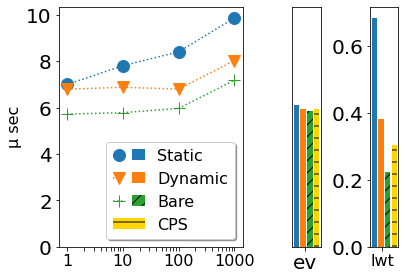

In [5]:


def show_pingpong(ax,ax2,ax3):   
    color1 = sta_color
    color2 = dyn_color
    color3 = bare_color
    color4 = cps_color
    
    lab1 = 'Static'
    lab2 = 'Dynamic'
    lab3 = 'Ideal'
    lab4 = 'CPS'
        
    hatch1=''
    hatch2=''
    hatch3='//'
    hatch4='-'
    
    ipc_conf = {'linestyle':'dotted'}
    
    x = [1,10,100,1000]
    xlabs = [str(xi) for xi in x]
    ax.set_xscale('log')
    
    sta, = ax.plot(x, mkdataIdx(ping,'ipc_static',xlabs), color=color1, marker=sta_marker, markersize=12, **ipc_conf)
    dyn, = ax.plot(x, mkdataIdx(ping,'ipc_dynamic',xlabs), color=color2, marker=dyn_marker, markersize=12, **ipc_conf)
    bar, = ax.plot(x, mkdataIdx(bare,'ipc_bare',xlabs), color=color3, marker='+', markersize=12, **ipc_conf)

    sta_ = ax.bar([0], [0], 0, color=color1, label=lab1, hatch=hatch1) 
    dyn_ = ax.bar([0], [0], 0, color=color2, label=lab2, hatch=hatch2) 
    bar_ = ax.bar([0], [0], 0, color=color3, label=lab3, hatch=hatch3) 
    cps_ = ax.bar([0], [0], 0, color=color4, label=lab4, hatch=hatch4) 
    
#    legend = ax.legend(loc='lower right', shadow=True, fontsize=14)
#    legend.get_frame().set_facecolor('#FFFFFF')
    
    ten = np.arange(1,10)
    ticks =  np.concatenate([ten, ten * 10, ten * 100, [1000]])
    ax.set_xticks(ticks)
    
    xlabs = [str(xi) if xi in [1,10,100,1000] else '' for xi in ticks]
    ax.set_xticklabels(xlabs, fontsize=16)
    
    width = 0.25
    colwidth = width*0.8
    x = np.arange(1) - 0.3
    ax2.bar(x, mkdata(ping,'ev_static'), colwidth, color=color1,hatch=hatch1) 
    ax2.bar(x + width*1, mkdata(ping,'ev_dynamic'), colwidth, color=color2, hatch=hatch2)
    ax2.bar(x + width*2, mkdata(bare,'ev_bare'), colwidth, color=color3, hatch=hatch3) 
    ax2.bar(x + width*3, mkdata(bare,'ev_bare_cps'), colwidth, color=color4, hatch=hatch4)
    ax2.set_xticks([0])
    ax2.set_xticklabels(['ev'], fontsize=20)
    ax2.yaxis.set_visible(False)

    ax3_ = ax3
    #ax3 = ax3.twinx()
    ax3_ = ax3
    #ax3_.set_yticklabels([])
    ax3.bar(x, mkdata(ping,'lwt_static'), colwidth, color=color1, hatch=hatch1) 
    ax3.bar(x + width*1, mkdata(ping,'lwt_dynamic'), colwidth, color=color2, hatch=hatch2)
    ax3.bar(x + width*2, mkdata(bare,'lwt_bare'), colwidth, color=color3, hatch=hatch3) 
    ax3.bar(x + width*3, mkdata(bare,'lwt_bare_cps'), colwidth, color=color4, hatch=hatch4)
    ax3.set_xticks([0])
    ax3.set_xticklabels(['lwt'], fontsize=16)
    #ax3.set_ylim(ymin=0, ymax = 0.8)
    #ax3.set_ylabel('μ sec', fontsize=16) 
    
    legend = ax.legend([(sta, sta_), (dyn,dyn_), (bar,bar_), cps_], ['Static', 'Dynamic', 'Bare', 'CPS'], 
                       fontsize=16,
                       loc='lower right',
                       shadow = True,
                       scatterpoints=1,
                       numpoints=1, 
                       handler_map={tuple: matplotlib.legend_handler.HandlerTuple(ndivide=None)})
    legend.get_frame().set_facecolor('#FFFFFF')


def show_pingpong_do():
    fig = plt.figure()
    gs = plt.GridSpec(1, 5, figure=fig)
    ax = fig.add_subplot(gs[0,0:3])
    ax2 = fig.add_subplot(gs[0,3], sharey=ax)
    ax3 = fig.add_subplot(gs[0,4])
    show_pingpong(ax,ax2,ax3)
    ax.set_ylabel('μ sec', fontsize=16) 
    plt.tight_layout()
    plt.show()

show_pingpong_do()


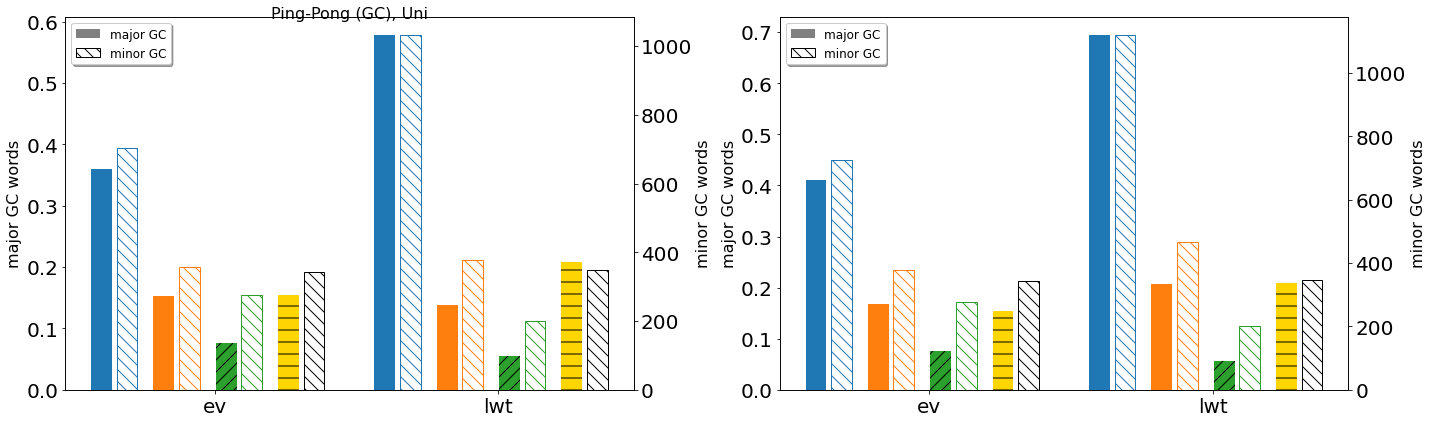

In [6]:
def show_graph4(ax, width, colwidth, x_labels, d1,lab1,d2,lab2,d3,lab3,d4,lab4, bare=False, shift=0.0, minor=False):
    x = np.arange(len(x_labels))
    color1 = sta_color
    color2 = dyn_color
    color3 = bare_color if bare else purple
    color4 = cps_color if bare else yellow
    (hatch1, hatch2, hatch3, hatch4) = ('', '', '//', '-')
    
    # (edgecolor1,edgecolor2,edgecolor3,edgecolor4) = ('none','none','none','none')
    (edgecolor1,edgecolor2,edgecolor3,edgecolor4) = ('none','none','black','black')
    (lw1,lw2,lw3,lw4) = (0,0,0,0)
    
    if minor:
        (edgecolor1,edgecolor2,edgecolor3,edgecolor4) = (color1, color2, color3, color4)
        (color1, color2, color3, color4) = ('none','none','none','none')
        (lw1,lw2,lw3,lw4) = (1,1,1,1)
        (hatch1, hatch2, hatch3, hatch4) = ('\\\\', '\\\\', '\\\\', '\\\\')
        
    #edgecolor=
        
    ax.bar(x + shift, d1, colwidth, color=color1, edgecolor=edgecolor1, lw=lw1, error_kw={'ecolor':'black',
                              'linewidth':2,'capthick':2}, hatch=hatch1) 
    ax.bar(x + width + shift, d2, colwidth, color=color2, edgecolor=edgecolor2, lw=lw2, error_kw={'ecolor':'black',
                              'linewidth':2,'capthick':2}, hatch=hatch2)
    ax.bar(x + width * 2 + shift, d3, colwidth, color=color3, edgecolor=edgecolor3, lw=lw3, error_kw={'ecolor':'black',
                              'linewidth':2,'capthick':2}, hatch=hatch3) 
    if lab4!='':
        if edgecolor4==yellow:
            edgecolor4 = 'black'
        ax.bar(x + width * 3 + shift, d4, colwidth, color=color4, edgecolor=edgecolor4, lw=lw4, error_kw={'ecolor':'black',
                              'linewidth':2,'capthick':2}, hatch=hatch4) 

def show_mem(ax, dyn_suffix='',sta_suffix='',cps_suffix=''):
    ax2 = ax.twinx()

    width = 0.22

    xlabs = ['ev', 'lwt']
    zero = [0.0 for x in xlabs]

    mjgc = 'major_words_per_run'
    show_graph4(ax, width, width/3,
              xlabs,
              [ping['ev_static'+sta_suffix][mjgc]]+[ping['lwt_static'+sta_suffix][mjgc]], 'Static'+sta_suffix,
              [ping['ev_dynamic'+dyn_suffix][mjgc]]+[ping['lwt_dynamic'+dyn_suffix][mjgc]], 'Dynamic'+dyn_suffix,
              [bare['ev_bare'][mjgc]]+[bare['lwt_bare'][mjgc]], 'Ideal',
              [bare['ev_bare_cps'+cps_suffix][mjgc]]+[bare['lwt_bare_cps'+cps_suffix][mjgc]], 'CPS'+cps_suffix,
              bare=True,
                shift=-0.15
              )
    ax.set_ylabel('major GC words', fontsize=16) 

    mngc = 'minor_words_per_run'
    show_graph4(ax2, width, width/3,
              xlabs,
              [ping['ev_static'+sta_suffix][mngc]]+[ping['lwt_static'+sta_suffix][mngc]], 'Static'+sta_suffix,
              [ping['ev_dynamic'+dyn_suffix][mngc]]+[ping['lwt_dynamic'+dyn_suffix][mngc]], 'Dynamic'+dyn_suffix,
              [bare['ev_bare'][mngc]]+[bare['lwt_bare'][mngc]], 'Ideal',
              [bare['ev_bare_cps'+cps_suffix][mngc]]+[bare['lwt_bare_cps'+cps_suffix][mngc]], 'CPS'+cps_suffix,
              bare=True, shift=-0.06, minor=True
              )

    # k='time_per_run_nanos'

    ax2.set_ylabel('minor GC words', fontsize=16)
    ax.set_xticks([0.25,1.25])
    ax.set_xticklabels(['ev', 'lwt'], fontsize=20)
    
    ax2.bar([1],[0],label='major GC', color='gray')
    ax2.bar([1],[0],label='minor GC', color='none', edgecolor='black', hatch='\\\\')

    legend = ax2.legend(loc='upper left', shadow=True, fontsize=12)
    legend.get_frame().set_facecolor('#FFFFFF')


def show_mem_do():
    fig, axes = plt.subplots(ncols=2, nrows=1, squeeze = False)
    fig.set_figheight(6)
    fig.set_figwidth(20)
    ax = axes[0][0]
    ax2 = axes[0][1]

    ax.set_title('Ping-Pong (GC)', fontsize=16, y=0.98)
    ax.set_title('Ping-Pong (GC), Uni', fontsize=16, y=0.98)

    show_mem(ax)
    show_mem(ax2, '_untyped','_untyped')

    plt.tight_layout()
    plt.show()

show_mem_do()

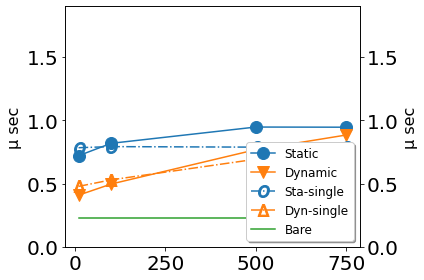

In [7]:

def show_nping_time(ax):
    width = 0.20
    colwidth = width * 0.8
    marker3='o'
    marker4='^'
    marker1='$o$'
    marker2='$\Delta$'
    marker5='+'
    marker6='x'
    sta_uni_col = 'darkcyan'
    dyn_uni_col = 'tan'
    sta_uni_col = sta_color
    dyn_uni_col = dyn_color
    
    lwt_conf = {'linestyle':'solid'}
    ev_conf = {'linestyle':'dashed'}
    
    
    k = 'time_per_run_nanos'
    x = [10,100,500,750]
    xlabs = [str(xi) for xi in x]
    def ev():
        bare_ = [mkdata(bare,'ev_bare') for _ in x]
        cps_ = [mkdata(bare,'ev_bare_cps') for _ in x]
        ax.plot(x, mkdataIdx(nping,'ev_static',xlabs,k), color=sta_color, marker=sta_marker, markersize=12, **ev_conf)
        ax.plot(x, mkdataIdx(nping,'ev_dynamic',xlabs,k), color=dyn_color, marker=dyn_marker, markersize=12, **ev_conf)
        #ax.plot(x, mkdataIdx(nping,'ev_static_untyped',xlabs,k), color=sta_uni_col, marker=marker3, markersize=12, label='Static(Uni)') 
        #ax.plot(x, mkdataIdx(nping,'ev_dynamic_untyped',xlabs,k), color=dyn_uni_col, marker=marker4, markersize=12, label='Dynamic(Uni)') 
    #    ax.plot(x, bare_, color=bare_color, marker=marker3, markersize=12) 
    #    ax.plot(x, cps_, color=cps_color, marker=marker4, markersize=12) 
        ax.plot(x, bare_, color=bare_color, **ev_conf) 
    # ev()

    def lwt():
        bare_ = [mkdata(bare,'lwt_bare') for _ in x]
        cps_ = [mkdata(bare,'lwt_bare_cps') for _ in x]
        ax2 = ax
        ax2.plot(x, mkdataIdx(nping,'lwt_static',xlabs,k), color=sta_color, label='Static', marker=sta_marker, markersize=12, **lwt_conf)
        ax2.plot(x, mkdataIdx(nping,'lwt_dynamic',xlabs,k), color=dyn_color, label='Dynamic', marker=dyn_marker, markersize=12, **lwt_conf)
        ax2.plot(x, mkdataIdx(nping,'lwt_static_single',xlabs,k), color=sta_uni_col, label='Sta-single', marker=marker1, markersize=12, linestyle='-.') 
        ax2.plot(x, mkdataIdx(nping,'lwt_dynamic_single',xlabs,k), color=dyn_uni_col, label='Dyn-single', marker=marker2, markersize=12, linestyle='-.') 
#        ax2.plot(x, bare_, color=bare_color, marker=marker3, markersize=12, linestyle='dashed') 
#        ax2.plot(x, cps_, color=cps_color, marker=marker4, markersize=12, linestyle='dashed') 
        ax2.plot(x, bare_, color=bare_color, label='Bare', **lwt_conf) 
    
        ax2.set_ylabel('μ sec', fontsize=16) 
        ax2.set_ylim(ymin=0, ymax = 1.9)
        ax2_ = ax.twinx()
        ax2_.set_ylabel('μ sec', fontsize=16) 
        ax2_.set_ylim(ymin=0, ymax = 1.9)
        
        legend = ax2.legend(loc='lower right', shadow=True, fontsize=12)
        legend.get_frame().set_facecolor('#FFFFFF')
        
    lwt()
    
def show_nping_time_do():
    fig, axes = plt.subplots(ncols=1, nrows=1, squeeze = False)
    show_nping_time(axes[0][0])
    #axes[0][0].set_ylim(ymin=0, ymax = 7)
    plt.tight_layout()
    plt.show()

show_nping_time_do()

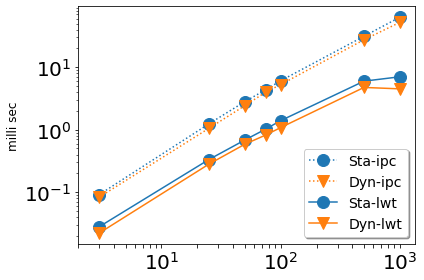

In [14]:
def show_chameleons(ax):
    width = 0.20
    colwidth = width * 0.8
    sta_uni_col = 'darkcyan'
    dyn_uni_col = 'tan'
    sta_uni_col = sta_color
    dyn_uni_col = dyn_color
    
    #x = [3, 25, 50, 75, 100, 500, 1000]
    x = [3, 25, 50, 75, 100, 500, 1000]
    x_labels = [str(xi) for xi in x]
    lwt_sta = mkdataIdxMillis(cham, 'lwt_static', x_labels)
    lwt_dyn = mkdataIdxMillis(cham, 'lwt_dynamic', x_labels)
    ipc_sta = mkdataIdxMillis(cham, 'lwt_ipc_static', x_labels)
    ipc_dyn = mkdataIdxMillis(cham, 'lwt_ipc_dynamic', x_labels)
    
    ax.plot(x, ipc_sta, color=sta_color, marker=sta_marker, markersize=12, linestyle='dotted', label='Sta-ipc')
    ax.plot(x, ipc_dyn, color=dyn_color, marker=dyn_marker, markersize=12, linestyle='dotted', label='Dyn-ipc')
    
    ax.plot(x, lwt_sta, color=sta_color, marker=sta_marker, markersize=12, linestyle='solid', label='Sta-lwt')
    ax.plot(x, lwt_dyn, color=dyn_color, marker=dyn_marker, markersize=12, linestyle='solid', label='Dyn-lwt')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ten = np.arange(1,10)
    ticks =  np.concatenate([ten, ten * 10, ten * 100, [1000]])
    ax.set_xticks(ticks)
    ax.set_xlim(xmin=2)
    legend = ax.legend(loc='lower right', shadow=True, fontsize=14)
    legend.get_frame().set_facecolor('#FFFFFF')

    
def show_chameleons_do():
    fig, axes = plt.subplots(ncols=1, nrows=1, squeeze = False)
    show_chameleons(axes[0][0])
    axes[0][0].set_ylabel('milli sec',fontsize=12)

    plt.tight_layout()
    plt.show()

show_chameleons_do()


<ipython-input-16-f87bcde1c75b>:58: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


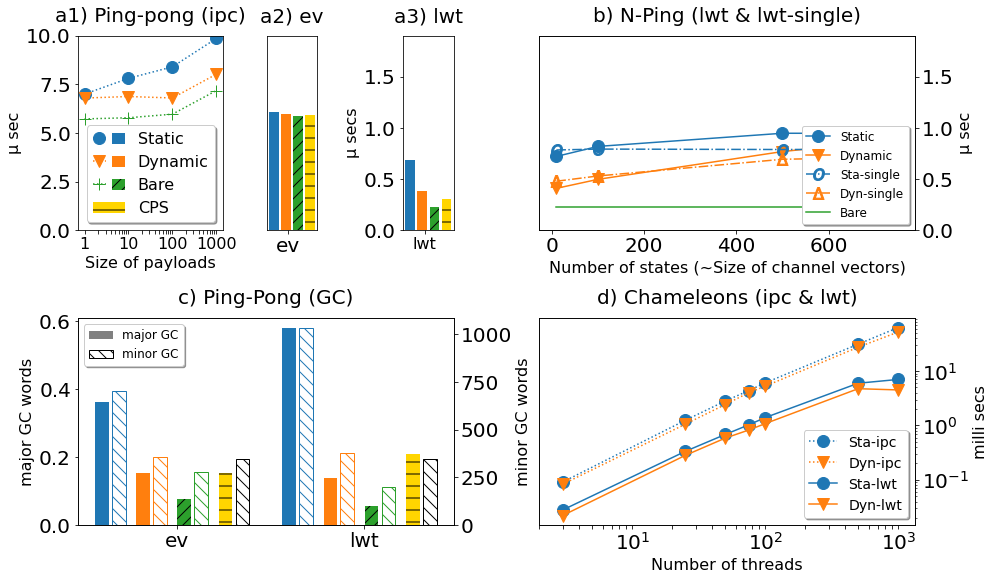

In [16]:
title_params = {
    'y':1.04,
    'fontsize':20,
}

fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(15)
sep = 16

gs = plt.GridSpec(40, 80, figure=fig)
ax = fig.add_subplot(gs[0:sep,0:14])
ax.set_xlabel('Size of payloads', fontsize=16) 
ax.set_ylabel('μ sec', fontsize=16) 
ax2 = fig.add_subplot(gs[0:sep,18:23])
ax3 = fig.add_subplot(gs[0:sep,31:36])
def __():
    ax2 = fig.add_subplot(gs[0:sep,24:29])
    ax3 = fig.add_subplot(gs[0:sep,31:36])
def __():
    ax2 = fig.add_subplot(gs[0:sep,31:36])
    ax3 = fig.add_subplot(gs[0:sep,44:49])

show_pingpong(ax,ax2,ax3)

ax.set_title('a1) Ping-pong (ipc)', **title_params)
ax2.set_title('a2) ev', **title_params)
ax3.set_title('a3) lwt', **title_params)
ax3.set_ylabel('µ secs', fontsize=16)

#ax4 = fig.add_subplot(gs[0:sep,50:80])
ax4 = fig.add_subplot(gs[0:sep,44:80])
show_nping_time(ax4)
ax4.set_title('b) N-Ping (lwt & lwt-single)', **title_params)
ax4.yaxis.set_visible(False)
ax4.set_xlabel('Number of states (~Size of channel vectors)', fontsize=16)

ax.set_ylim(ymin=0, ymax=10)
ax2.set_ylim(ymin=0, ymax=10)

ax3.set_ylim(ymin=0, ymax=1.0)
ax4.set_ylim(ymin=0, ymax=1.0)



ax5 = fig.add_subplot(gs[23:40,0:36])
show_mem(ax5)
ax5.set_title('c) Ping-Pong (GC)', **title_params)

ax6 = fig.add_subplot(gs[23:40,44:80])
ax6tw = ax6.twinx()
show_chameleons(ax6tw)
ax6.yaxis.set_visible(False)
ax6tw.set_ylabel('milli secs', fontsize=16)
ax6.set_title('d) Chameleons (ipc & lwt)', **title_params)
ax6.set_xlabel('Number of threads', fontsize=16)

plt.tight_layout()
plt.savefig('main_graph.pdf', format='pdf', pad_inches=0)
plt.show()



